# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=15_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=10_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=10_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus3'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
if True:
    cc1.explain()
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results2',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.952    |
| fps                | 1980     |
| nupdates           | 1        |
| policy_entropy     | 0.67     |
| policy_loss        | -0.0221  |
| total_timesteps    | 0        |
| value_loss         | 0.425    |
-----------------------------

---------------------------------
| explained_variance | 0.583    |
| fps                | 2721     |
| nupdates           | 20       |
| policy_entropy     | 0.565    |
| policy_loss        | -1.79    |
| total_timesteps    | 77539    |
| value_loss         | 11.3     |
---------------------------------
---------------------------------
| explained_variance | 0.89     |
| fps                | 2651     |
| nupdates           | 30       |
| policy_entropy     | 0.702    |
| policy_loss        | 0.456    |
| total_timesteps    | 118349   |
| value_loss         | 1.41     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2618     |
| nupdates           | 40       |
| policy_entropy     | 0.664    |
| policy_loss        | 0.767    |
| total_timesteps    | 159159   |
| value_loss         | 2        |
---------------------------------
---------------------------------
| explained_variance | 0.895    |
| fps         

---------------------------------
| explained_variance | 0.866    |
| fps                | 152      |
| nupdates           | 290      |
| policy_entropy     | 0.753    |
| policy_loss        | -0.975   |
| total_timesteps    | 1179409  |
| value_loss         | 2.84     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 157      |
| nupdates           | 300      |
| policy_entropy     | 0.697    |
| policy_loss        | -0.332   |
| total_timesteps    | 1220219  |
| value_loss         | 0.681    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 162      |
| nupdates           | 310      |
| policy_entropy     | 0.669    |
| policy_loss        | 0.508    |
| total_timesteps    | 1261029  |
| value_loss         | 1.11     |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 279      |
| nupdates           | 560      |
| policy_entropy     | 0.621    |
| policy_loss        | 0.0225   |
| total_timesteps    | 2281279  |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 284      |
| nupdates           | 570      |
| policy_entropy     | 0.709    |
| policy_loss        | -0.07    |
| total_timesteps    | 2322089  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 288      |
| nupdates           | 580      |
| policy_entropy     | 0.688    |
| policy_loss        | -0.0163  |
| total_timesteps    | 2362899  |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 394      |
| nupdates           | 830      |
| policy_entropy     | 0.696    |
| policy_loss        | 0.0102   |
| total_timesteps    | 3383149  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 398      |
| nupdates           | 840      |
| policy_entropy     | 0.665    |
| policy_loss        | -0.012   |
| total_timesteps    | 3423959  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 402      |
| nupdates           | 850      |
| policy_entropy     | 0.699    |
| policy_loss        | -0.111   |
| total_timesteps    | 3464769  |
| value_loss         | 0.506    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 498      |
| nupdates           | 1100     |
| policy_entropy     | 0.708    |
| policy_loss        | 0.054    |
| total_timesteps    | 4485019  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 501      |
| nupdates           | 1110     |
| policy_entropy     | 0.637    |
| policy_loss        | -0.00839 |
| total_timesteps    | 4525829  |
| value_loss         | 0.508    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 505      |
| nupdates           | 1120     |
| policy_entropy     | 0.616    |
| policy_loss        | -0.0305  |
| total_timesteps    | 4566639  |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 592      |
| nupdates           | 1370     |
| policy_entropy     | 0.713    |
| policy_loss        | 0.0141   |
| total_timesteps    | 5586889  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 596      |
| nupdates           | 1380     |
| policy_entropy     | 0.689    |
| policy_loss        | -0.0269  |
| total_timesteps    | 5627699  |
| value_loss         | 0.552    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 599      |
| nupdates           | 1390     |
| policy_entropy     | 0.649    |
| policy_loss        | 0.0114   |
| total_timesteps    | 5668509  |
| value_loss         | 0.22     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 679      |
| nupdates           | 1640     |
| policy_entropy     | 0.646    |
| policy_loss        | 0.0576   |
| total_timesteps    | 6688759  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 682      |
| nupdates           | 1650     |
| policy_entropy     | 0.713    |
| policy_loss        | 0.00669  |
| total_timesteps    | 6729569  |
| value_loss         | 0.304    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 685      |
| nupdates           | 1660     |
| policy_entropy     | 0.687    |
| policy_loss        | -0.0132  |
| total_timesteps    | 6770379  |
| value_loss         | 0.519    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 759      |
| nupdates           | 1910     |
| policy_entropy     | 0.69     |
| policy_loss        | -0.0232  |
| total_timesteps    | 7790629  |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 761      |
| nupdates           | 1920     |
| policy_entropy     | 0.668    |
| policy_loss        | -0.0498  |
| total_timesteps    | 7831439  |
| value_loss         | 0.444    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 764      |
| nupdates           | 1930     |
| policy_entropy     | 0.699    |
| policy_loss        | 0.0655   |
| total_timesteps    | 7872249  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 832      |
| nupdates           | 2180     |
| policy_entropy     | 0.671    |
| policy_loss        | 0.0714   |
| total_timesteps    | 8892499  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 835      |
| nupdates           | 2190     |
| policy_entropy     | 0.647    |
| policy_loss        | 0.0529   |
| total_timesteps    | 8933309  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 838      |
| nupdates           | 2200     |
| policy_entropy     | 0.665    |
| policy_loss        | -0.151   |
| total_timesteps    | 8974119  |
| value_loss         | 0.393    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 901      |
| nupdates           | 2450     |
| policy_entropy     | 0.684    |
| policy_loss        | 0.0216   |
| total_timesteps    | 9994369  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 903      |
| nupdates           | 2460     |
| policy_entropy     | 0.695    |
| policy_loss        | -0.056   |
| total_timesteps    | 10035179 |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 905      |
| nupdates           | 2470     |
| policy_entropy     | 0.674    |
| policy_loss        | 0.104    |
| total_timesteps    | 10075989 |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 964      |
| nupdates           | 2720     |
| policy_entropy     | 0.655    |
| policy_loss        | 0.0112   |
| total_timesteps    | 11096239 |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 966      |
| nupdates           | 2730     |
| policy_entropy     | 0.663    |
| policy_loss        | 0.0206   |
| total_timesteps    | 11137049 |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 968      |
| nupdates           | 2740     |
| policy_entropy     | 0.642    |
| policy_loss        | -0.0147  |
| total_timesteps    | 11177859 |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1022     |
| nupdates           | 2990     |
| policy_entropy     | 0.726    |
| policy_loss        | -0.00318 |
| total_timesteps    | 12198109 |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1025     |
| nupdates           | 3000     |
| policy_entropy     | 0.655    |
| policy_loss        | 0.0979   |
| total_timesteps    | 12238919 |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1027     |
| nupdates           | 3010     |
| policy_entropy     | 0.681    |
| policy_loss        | -0.0627  |
| total_timesteps    | 12279729 |
| value_loss         | 0.525    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1077     |
| nupdates           | 3260     |
| policy_entropy     | 0.701    |
| policy_loss        | 0.0371   |
| total_timesteps    | 13299979 |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1079     |
| nupdates           | 3270     |
| policy_entropy     | 0.645    |
| policy_loss        | -0.0302  |
| total_timesteps    | 13340789 |
| value_loss         | 0.591    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1081     |
| nupdates           | 3280     |
| policy_entropy     | 0.67     |
| policy_loss        | -0.0892  |
| total_timesteps    | 13381599 |
| value_loss         | 0.461    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1127     |
| nupdates           | 3530     |
| policy_entropy     | 0.696    |
| policy_loss        | -0.0376  |
| total_timesteps    | 14401849 |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1129     |
| nupdates           | 3540     |
| policy_entropy     | 0.66     |
| policy_loss        | -0.0271  |
| total_timesteps    | 14442659 |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1130     |
| nupdates           | 3550     |
| policy_entropy     | 0.673    |
| policy_loss        | 0.0537   |
| total_timesteps    | 14483469 |
| value_loss         | 0.443    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

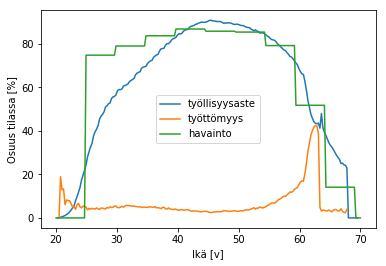

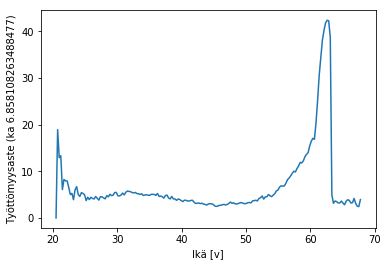

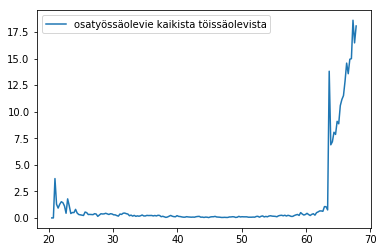

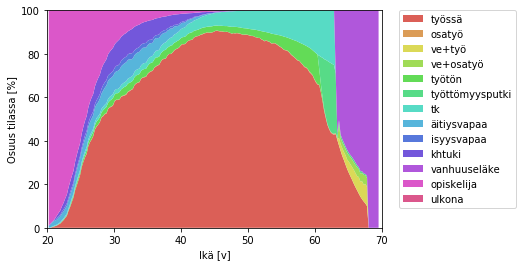

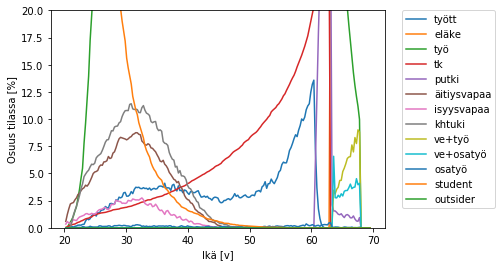

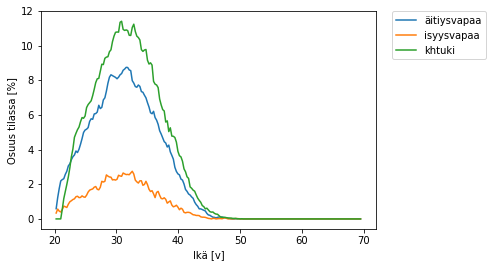

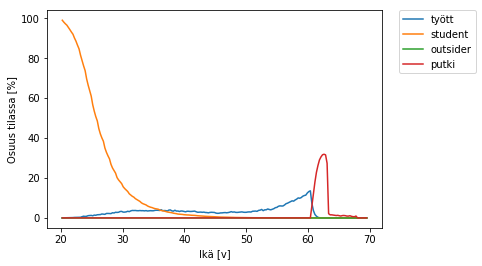

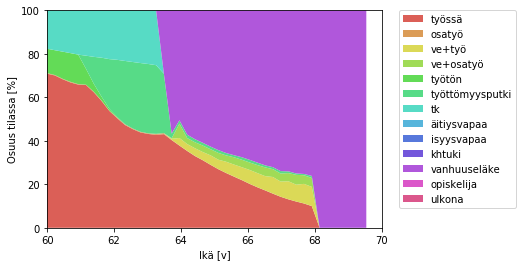

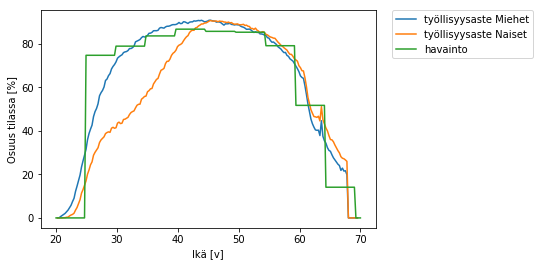

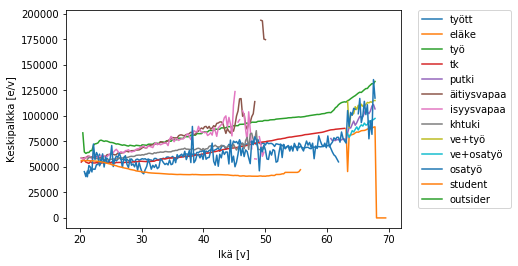

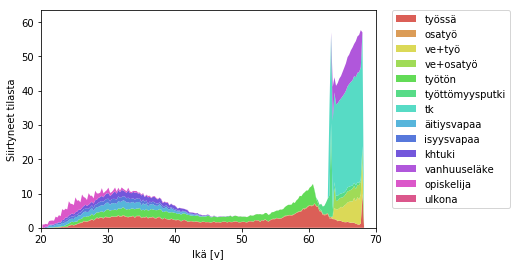

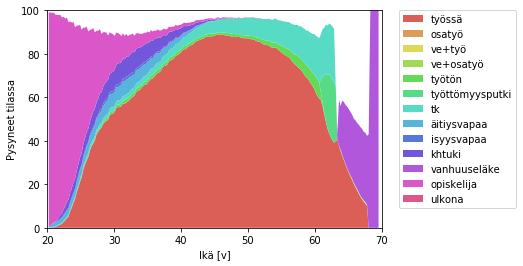

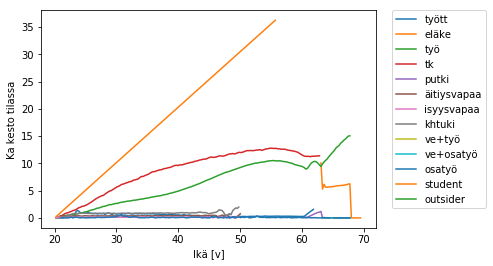

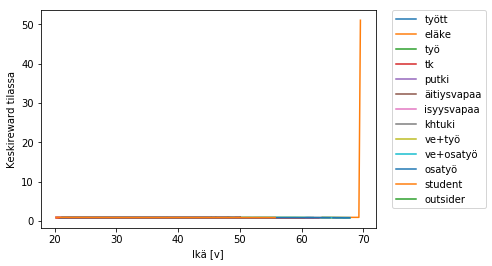

No handles with labels found to put in legend.


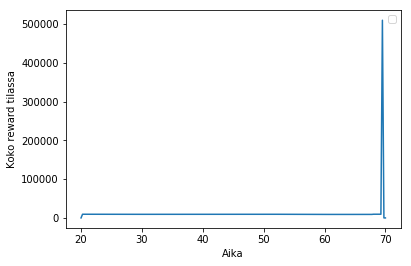

Yhteensä reward 236.7941627140723


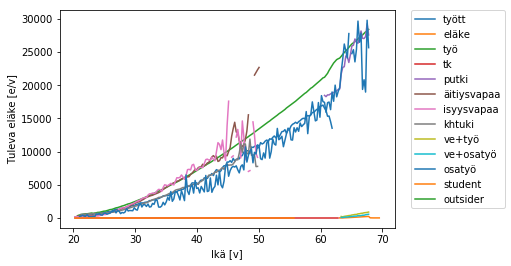

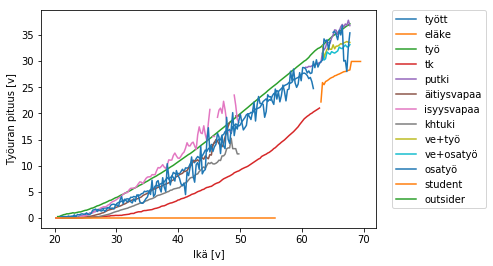

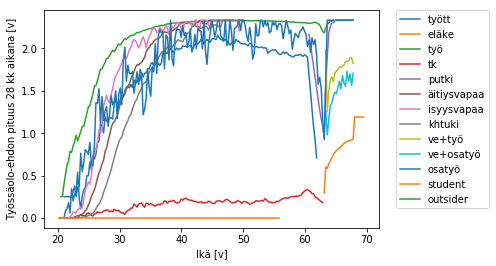

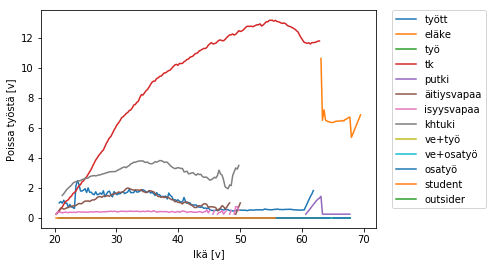

In [4]:
cc1.render(load='results/perus_results2')

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.965    |
| fps                | 2057     |
| nupdates           | 1        |
| policy_entropy     | 0.648    |
| policy_loss        | -0.013   |
| total_timesteps    | 0        |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | -0.34    |
| fps                | 3114     |
| nupdates           | 10       |
| policy_entropy     | 0.105    |
| policy_loss        | -0.59    |
| total_timesteps    | 36729    |
| value_loss         | 67.1     |
---------------------------------
---------------------------------
| explained_variance | 0.69     |
| fps                | 2808     |
| nupdates           | 20       |
| policy_entropy     | 0.104    |
| policy_loss        | -0.499   |
| total_timesteps    | 77539    |
| value_loss         | 36.9     |
------------------------

---------------------------------
| explained_variance | 0.92     |
| fps                | 2591     |
| nupdates           | 270      |
| policy_entropy     | 0.204    |
| policy_loss        | 0.192    |
| total_timesteps    | 1097789  |
| value_loss         | 1.84     |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 2591     |
| nupdates           | 280      |
| policy_entropy     | 0.21     |
| policy_loss        | -0.146   |
| total_timesteps    | 1138599  |
| value_loss         | 0.7      |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps                | 2591     |
| nupdates           | 290      |
| policy_entropy     | 0.221    |
| policy_loss        | -0.0772  |
| total_timesteps    | 1179409  |
| value_loss         | 1.38     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2591     |
| nupdates           | 540      |
| policy_entropy     | 0.402    |
| policy_loss        | -0.0482  |
| total_timesteps    | 2199659  |
| value_loss         | 0.555    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2592     |
| nupdates           | 550      |
| policy_entropy     | 0.353    |
| policy_loss        | 0.0483   |
| total_timesteps    | 2240469  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2592     |
| nupdates           | 560      |
| policy_entropy     | 0.367    |
| policy_loss        | 0.018    |
| total_timesteps    | 2281279  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 2598     |
| nupdates           | 810      |
| policy_entropy     | 0.672    |
| policy_loss        | -0.0825  |
| total_timesteps    | 3301529  |
| value_loss         | 0.497    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2598     |
| nupdates           | 820      |
| policy_entropy     | 0.651    |
| policy_loss        | -0.0409  |
| total_timesteps    | 3342339  |
| value_loss         | 0.429    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2599     |
| nupdates           | 830      |
| policy_entropy     | 0.643    |
| policy_loss        | -0.00388 |
| total_timesteps    | 3383149  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2603     |
| nupdates           | 1080     |
| policy_entropy     | 0.611    |
| policy_loss        | -0.0412  |
| total_timesteps    | 4403399  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2603     |
| nupdates           | 1090     |
| policy_entropy     | 0.657    |
| policy_loss        | 0.00478  |
| total_timesteps    | 4444209  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2603     |
| nupdates           | 1100     |
| policy_entropy     | 0.617    |
| policy_loss        | -0.0238  |
| total_timesteps    | 4485019  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.935    |
| fps                | 2609     |
| nupdates           | 1350     |
| policy_entropy     | 0.673    |
| policy_loss        | 0.069    |
| total_timesteps    | 5505269  |
| value_loss         | 0.527    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2609     |
| nupdates           | 1360     |
| policy_entropy     | 0.719    |
| policy_loss        | -0.0894  |
| total_timesteps    | 5546079  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2609     |
| nupdates           | 1370     |
| policy_entropy     | 0.624    |
| policy_loss        | 0.0386   |
| total_timesteps    | 5586889  |
| value_loss         | 0.183    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2613     |
| nupdates           | 1620     |
| policy_entropy     | 0.614    |
| policy_loss        | 0.149    |
| total_timesteps    | 6607139  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2613     |
| nupdates           | 1630     |
| policy_entropy     | 0.661    |
| policy_loss        | -0.0399  |
| total_timesteps    | 6647949  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2614     |
| nupdates           | 1640     |
| policy_entropy     | 0.704    |
| policy_loss        | -0.0225  |
| total_timesteps    | 6688759  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2618     |
| nupdates           | 1890     |
| policy_entropy     | 0.65     |
| policy_loss        | -0.0423  |
| total_timesteps    | 7709009  |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2618     |
| nupdates           | 1900     |
| policy_entropy     | 0.67     |
| policy_loss        | -0.00366 |
| total_timesteps    | 7749819  |
| value_loss         | 0.46     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2618     |
| nupdates           | 1910     |
| policy_entropy     | 0.692    |
| policy_loss        | -0.0328  |
| total_timesteps    | 7790629  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2621     |
| nupdates           | 2160     |
| policy_entropy     | 0.716    |
| policy_loss        | -0.0054  |
| total_timesteps    | 8810879  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2621     |
| nupdates           | 2170     |
| policy_entropy     | 0.671    |
| policy_loss        | 0.0386   |
| total_timesteps    | 8851689  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2621     |
| nupdates           | 2180     |
| policy_entropy     | 0.598    |
| policy_loss        | 0.0684   |
| total_timesteps    | 8892499  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2624     |
| nupdates           | 2430     |
| policy_entropy     | 0.656    |
| policy_loss        | -0.00469 |
| total_timesteps    | 9912749  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2624     |
| nupdates           | 2440     |
| policy_entropy     | 0.682    |
| policy_loss        | 0.00221  |
| total_timesteps    | 9953559  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2624     |
| nupdates           | 2450     |
| policy_entropy     | 0.624    |
| policy_loss        | 0.0427   |
| total_timesteps    | 9994369  |
| value_loss         | 0.23     |
---------------------------------
done
predict...
simulating  best/malli_steps
predicting...


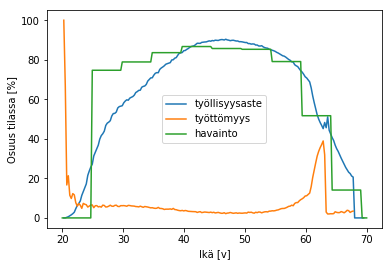

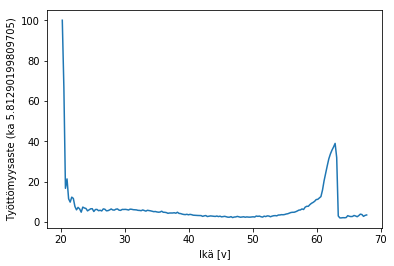

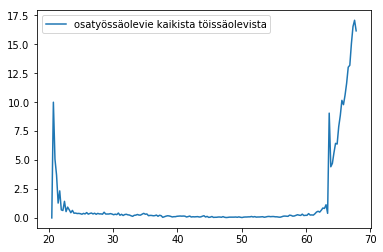

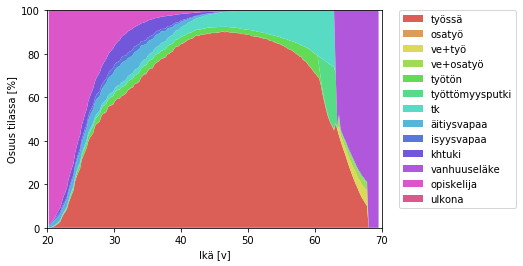

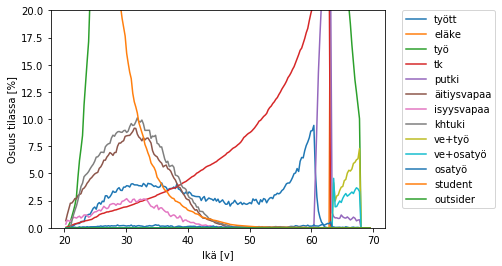

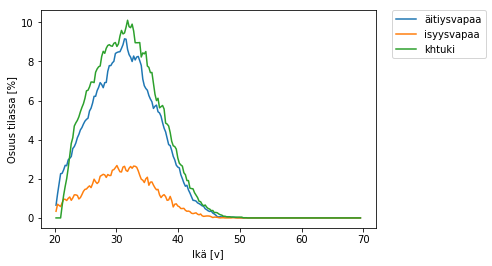

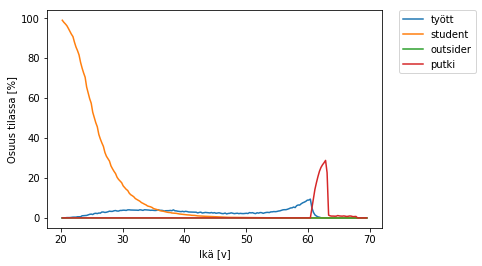

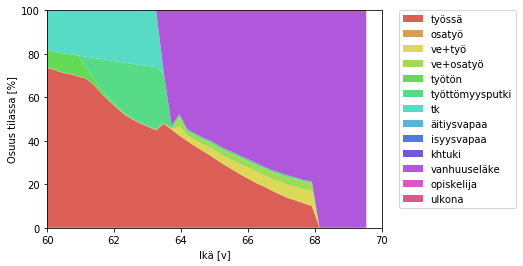

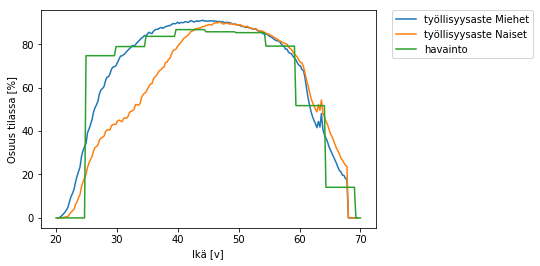

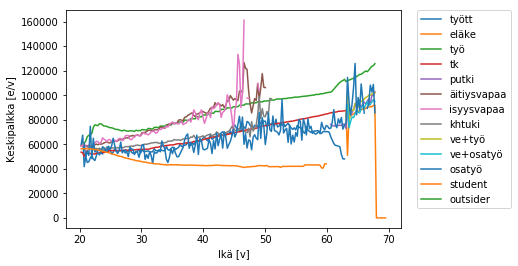

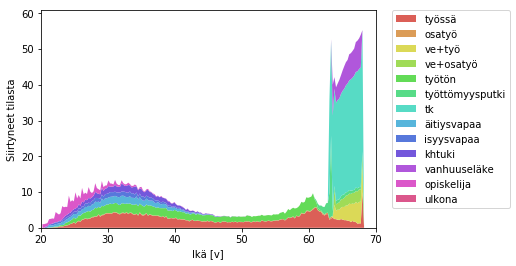

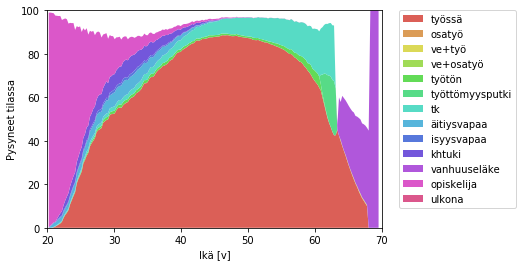

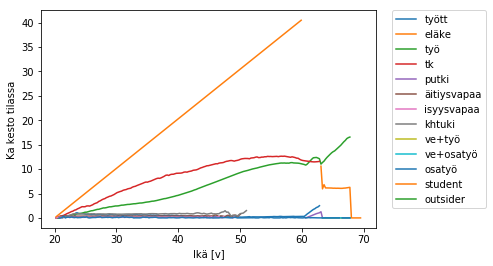

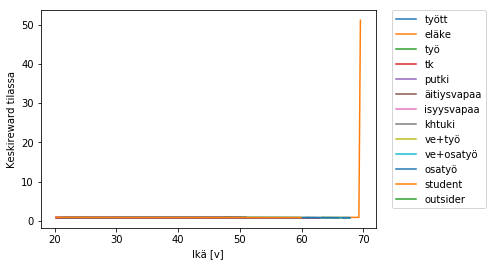

No handles with labels found to put in legend.


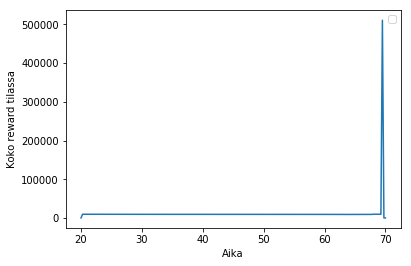

Yhteensä reward 236.8596810642686


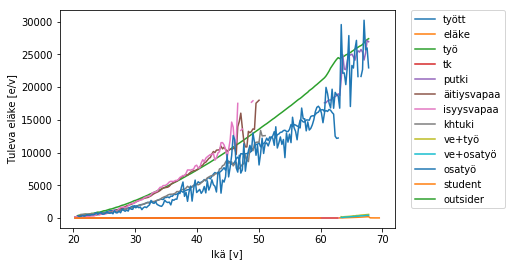

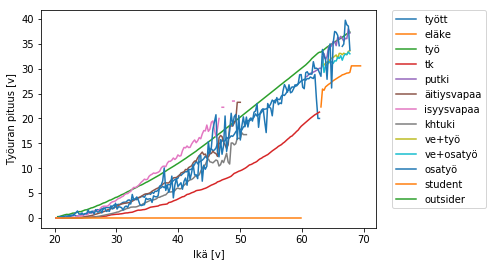

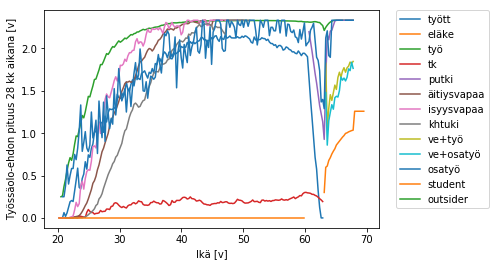

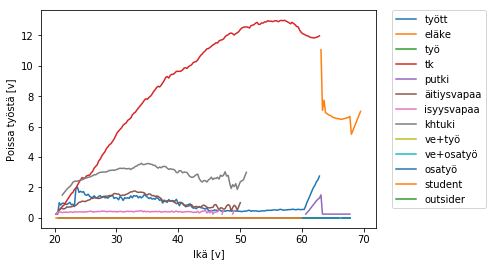

In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


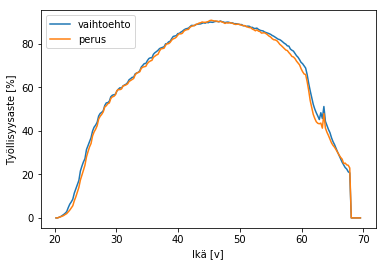

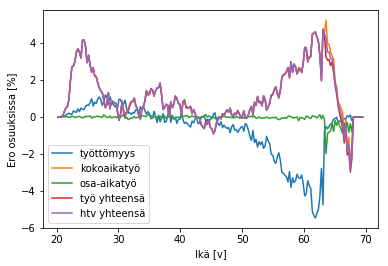

Työllisyysvaikutus 30-63-vuotiaisiin noin 22848.0 htv ja 22742.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 3.084777811085493 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10369457558769953


In [ ]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.97     |
| fps                | 2060     |
| nupdates           | 1        |
| policy_entropy     | 0.636    |
| policy_loss        | -0.00785 |
| total_timesteps    | 0        |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | -0.109   |
| fps                | 3100     |
| nupdates           | 10       |
| policy_entropy     | 0.38     |
| policy_loss        | -2.3     |
| total_timesteps    | 36729    |
| value_loss         | 48.8     |
---------------------------------
---------------------------------
| explained_variance | 0.688    |
| fps                | 2786     |
| nupdates           | 20       |
| policy_entropy     | 0.477    |
| policy_loss        | -1.75    |
| total_timesteps    | 77539    |
| value_loss         | 17.7     |
------------------------

---------------------------------
| explained_variance | 0.944    |
| fps                | 2588     |
| nupdates           | 270      |
| policy_entropy     | 0.617    |
| policy_loss        | 0.823    |
| total_timesteps    | 1097789  |
| value_loss         | 2.38     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2588     |
| nupdates           | 280      |
| policy_entropy     | 0.644    |
| policy_loss        | 0.194    |
| total_timesteps    | 1138599  |
| value_loss         | 0.853    |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 2589     |
| nupdates           | 290      |
| policy_entropy     | 0.633    |
| policy_loss        | -0.832   |
| total_timesteps    | 1179409  |
| value_loss         | 2.24     |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         

----------------------------------
| explained_variance | 0.964     |
| fps                | 2592      |
| nupdates           | 540       |
| policy_entropy     | 0.711     |
| policy_loss        | -4.54e-05 |
| total_timesteps    | 2199659   |
| value_loss         | 0.385     |
----------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2592     |
| nupdates           | 550      |
| policy_entropy     | 0.722    |
| policy_loss        | 8.17e-05 |
| total_timesteps    | 2240469  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2593     |
| nupdates           | 560      |
| policy_entropy     | 0.731    |
| policy_loss        | 0.00397  |
| total_timesteps    | 2281279  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps

---------------------------------
| explained_variance | 0.984    |
| fps                | 2595     |
| nupdates           | 810      |
| policy_entropy     | 0.681    |
| policy_loss        | -0.0179  |
| total_timesteps    | 3301529  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2595     |
| nupdates           | 820      |
| policy_entropy     | 0.707    |
| policy_loss        | -0.0652  |
| total_timesteps    | 3342339  |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2595     |
| nupdates           | 830      |
| policy_entropy     | 0.677    |
| policy_loss        | 0.0798   |
| total_timesteps    | 3383149  |
| value_loss         | 0.198    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2600     |
| nupdates           | 1080     |
| policy_entropy     | 0.61     |
| policy_loss        | 0.0158   |
| total_timesteps    | 4403399  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2600     |
| nupdates           | 1090     |
| policy_entropy     | 0.654    |
| policy_loss        | -0.0229  |
| total_timesteps    | 4444209  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2600     |
| nupdates           | 1100     |
| policy_entropy     | 0.671    |
| policy_loss        | -0.0817  |
| total_timesteps    | 4485019  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2603     |
| nupdates           | 1350     |
| policy_entropy     | 0.717    |
| policy_loss        | -0.0459  |
| total_timesteps    | 5505269  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 2604     |
| nupdates           | 1360     |
| policy_entropy     | 0.746    |
| policy_loss        | -0.0738  |
| total_timesteps    | 5546079  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2604     |
| nupdates           | 1370     |
| policy_entropy     | 0.695    |
| policy_loss        | 0.00559  |
| total_timesteps    | 5586889  |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2607     |
| nupdates           | 1620     |
| policy_entropy     | 0.682    |
| policy_loss        | 0.00706  |
| total_timesteps    | 6607139  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2607     |
| nupdates           | 1630     |
| policy_entropy     | 0.744    |
| policy_loss        | -0.109   |
| total_timesteps    | 6647949  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2608     |
| nupdates           | 1640     |
| policy_entropy     | 0.691    |
| policy_loss        | 0.0758   |
| total_timesteps    | 6688759  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2611     |
| nupdates           | 1890     |
| policy_entropy     | 0.648    |
| policy_loss        | 0.059    |
| total_timesteps    | 7709009  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2611     |
| nupdates           | 1900     |
| policy_entropy     | 0.612    |
| policy_loss        | -0.0224  |
| total_timesteps    | 7749819  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2612     |
| nupdates           | 1910     |
| policy_entropy     | 0.675    |
| policy_loss        | 0.0384   |
| total_timesteps    | 7790629  |
| value_loss         | 0.234    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2614     |
| nupdates           | 2160     |
| policy_entropy     | 0.672    |
| policy_loss        | 0.00951  |
| total_timesteps    | 8810879  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2614     |
| nupdates           | 2170     |
| policy_entropy     | 0.68     |
| policy_loss        | -0.0394  |
| total_timesteps    | 8851689  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2615     |
| nupdates           | 2180     |
| policy_entropy     | 0.678    |
| policy_loss        | 0.00963  |
| total_timesteps    | 8892499  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 2617     |
| nupdates           | 2430     |
| policy_entropy     | 0.672    |
| policy_loss        | -0.0299  |
| total_timesteps    | 9912749  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2618     |
| nupdates           | 2440     |
| policy_entropy     | 0.665    |
| policy_loss        | -0.114   |
| total_timesteps    | 9953559  |
| value_loss         | 0.413    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2618     |
| nupdates           | 2450     |
| policy_entropy     | 0.717    |
| policy_loss        | -0.081   |
| total_timesteps    | 9994369  |
| value_loss         | 0.515    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2619     |
| nupdates           | 2700     |
| policy_entropy     | 0.617    |
| policy_loss        | 0.121    |
| total_timesteps    | 11014619 |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2619     |
| nupdates           | 2710     |
| policy_entropy     | 0.652    |
| policy_loss        | -0.0195  |
| total_timesteps    | 11055429 |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2620     |
| nupdates           | 2720     |
| policy_entropy     | 0.681    |
| policy_loss        | -0.0518  |
| total_timesteps    | 11096239 |
| value_loss         | 0.347    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2620     |
| nupdates           | 2970     |
| policy_entropy     | 0.672    |
| policy_loss        | 0.0543   |
| total_timesteps    | 12116489 |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2620     |
| nupdates           | 2980     |
| policy_entropy     | 0.686    |
| policy_loss        | -0.0548  |
| total_timesteps    | 12157299 |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2620     |
| nupdates           | 2990     |
| policy_entropy     | 0.67     |
| policy_loss        | -0.0129  |
| total_timesteps    | 12198109 |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.94     |
| fps                | 2619     |
| nupdates           | 3240     |
| policy_entropy     | 0.685    |
| policy_loss        | 0.00827  |
| total_timesteps    | 13218359 |
| value_loss         | 0.515    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2619     |
| nupdates           | 3250     |
| policy_entropy     | 0.691    |
| policy_loss        | 0.00301  |
| total_timesteps    | 13259169 |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2619     |
| nupdates           | 3260     |
| policy_entropy     | 0.679    |
| policy_loss        | 0.00044  |
| total_timesteps    | 13299979 |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2617     |
| nupdates           | 3510     |
| policy_entropy     | 0.709    |
| policy_loss        | 0.0134   |
| total_timesteps    | 14320229 |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2616     |
| nupdates           | 3520     |
| policy_entropy     | 0.653    |
| policy_loss        | 0.0307   |
| total_timesteps    | 14361039 |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2616     |
| nupdates           | 3530     |
| policy_entropy     | 0.686    |
| policy_loss        | 0.0229   |
| total_timesteps    | 14401849 |
| value_loss         | 0.264    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

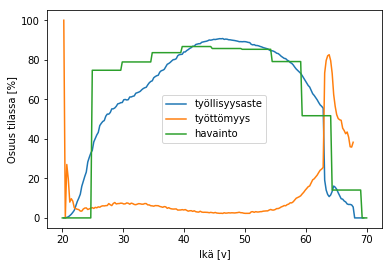

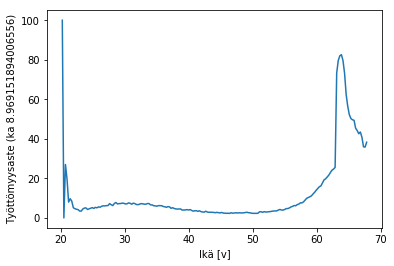

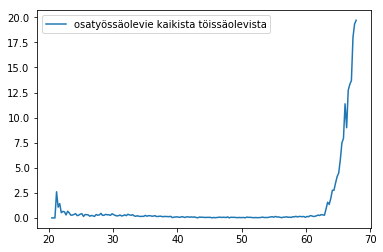

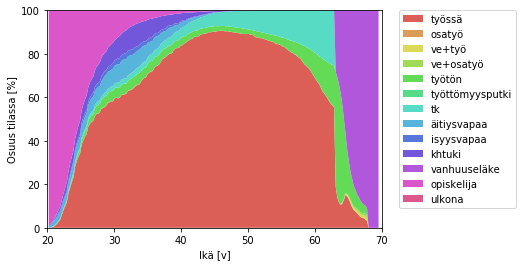

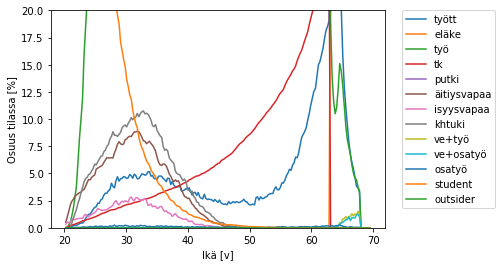

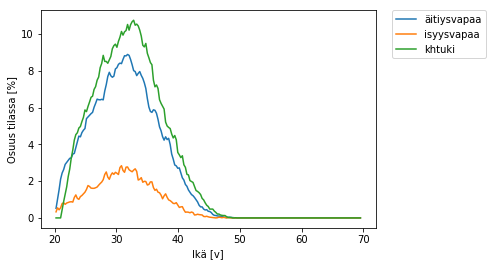

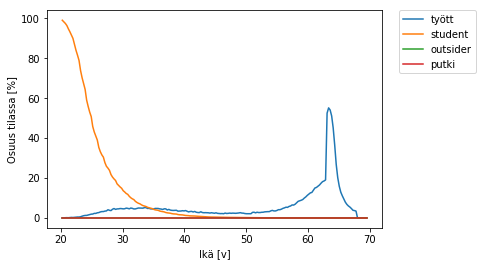

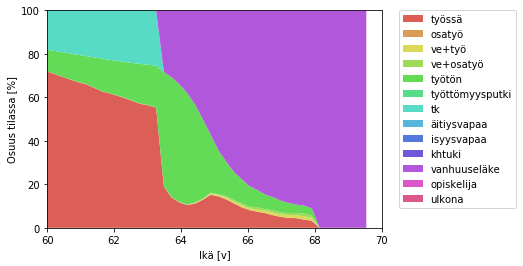

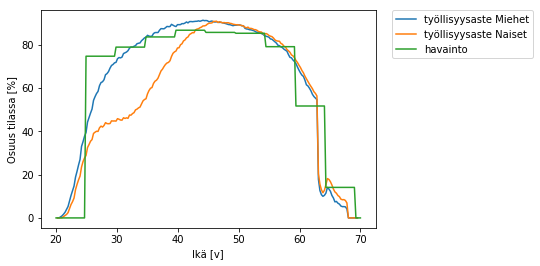

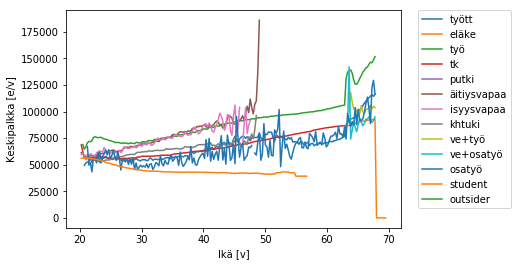

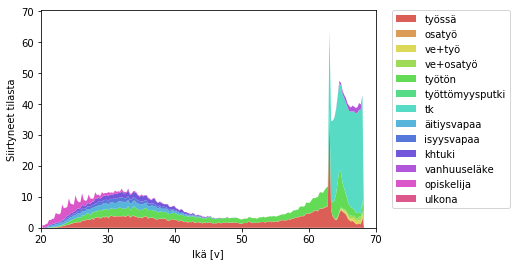

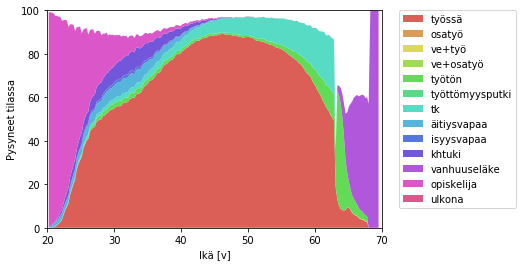

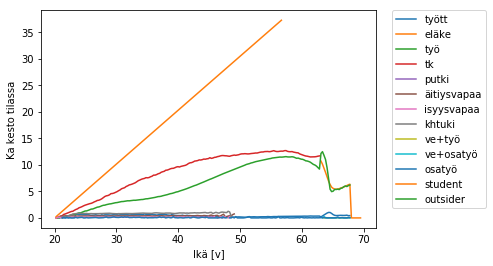

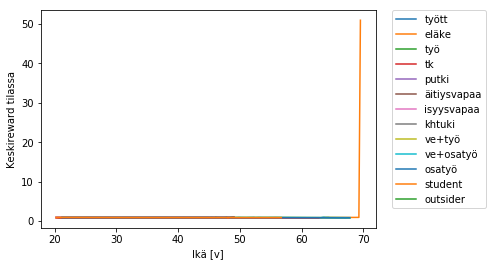

No handles with labels found to put in legend.


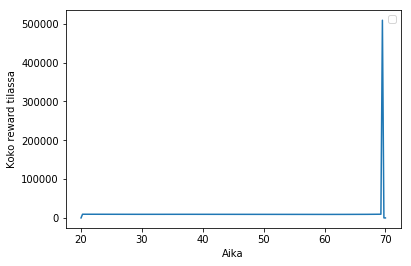

Yhteensä reward 236.8216811479839


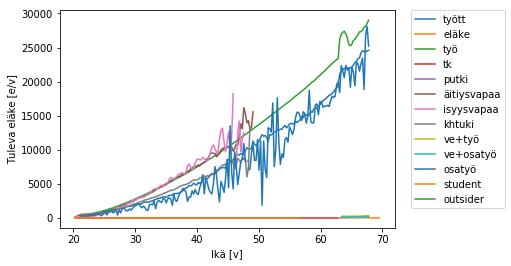

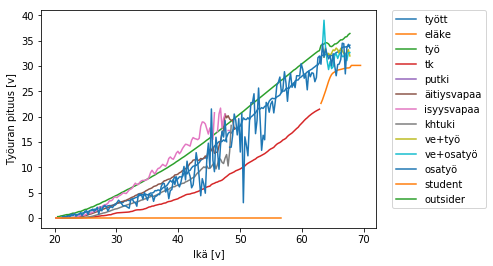

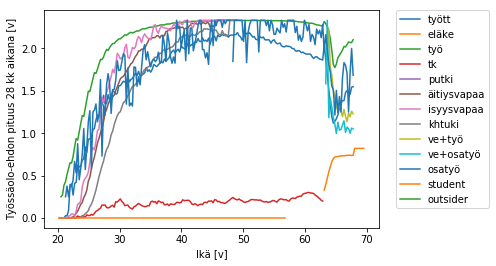

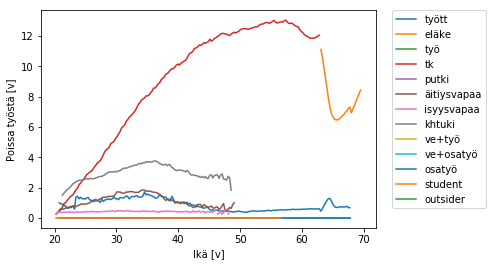

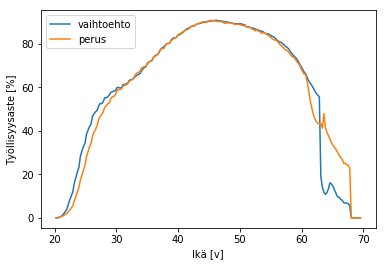

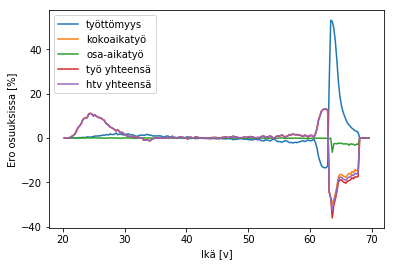

Työllisyysvaikutus 30-63-vuotiaisiin noin 17285.0 htv ja 16742.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 2.270923846328099 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10178545204690609


In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

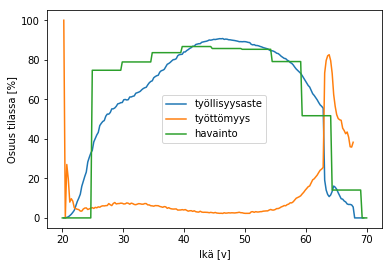

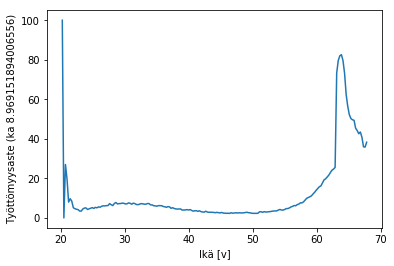

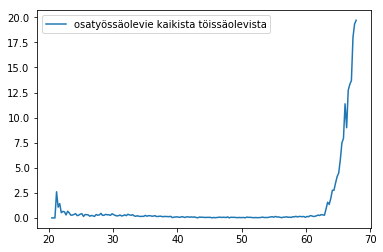

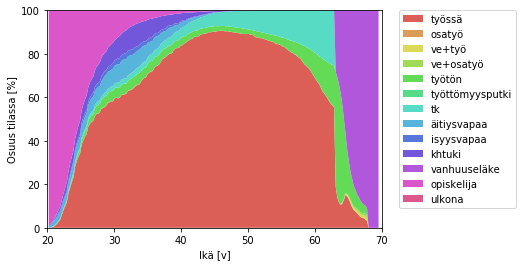

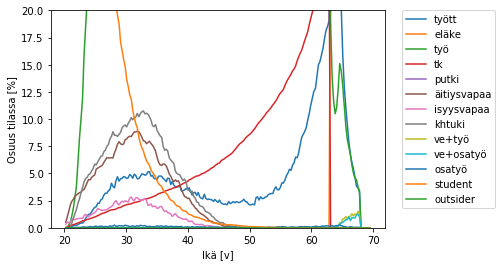

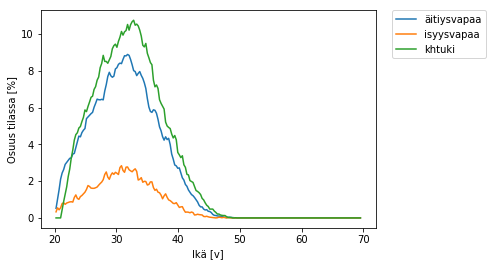

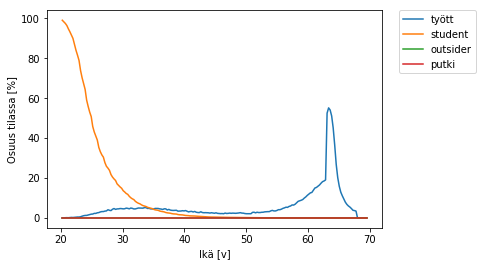

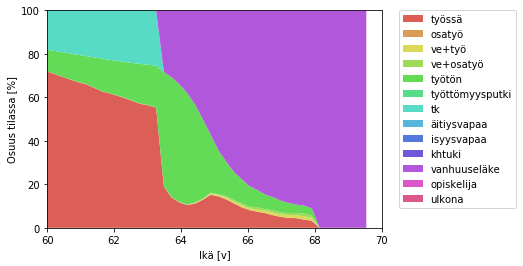

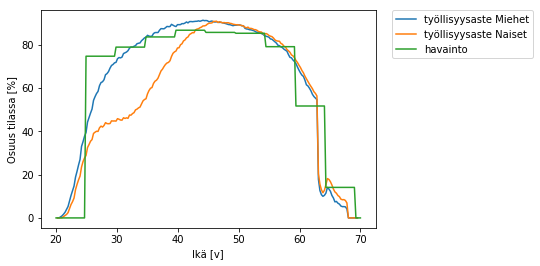

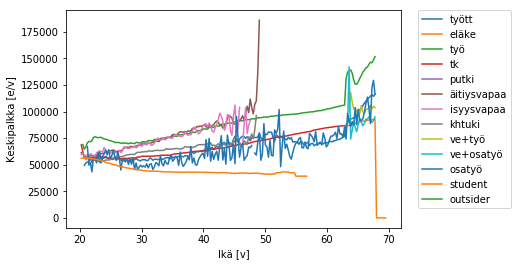

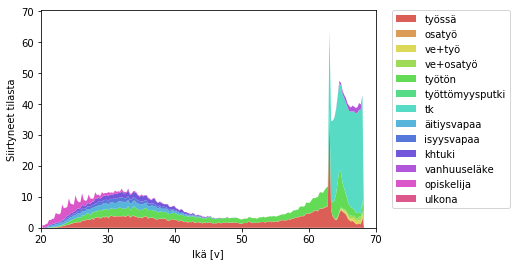

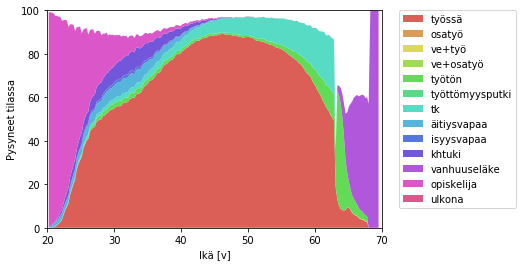

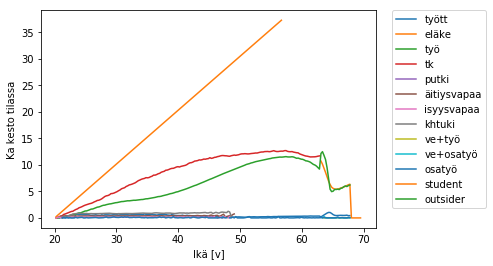

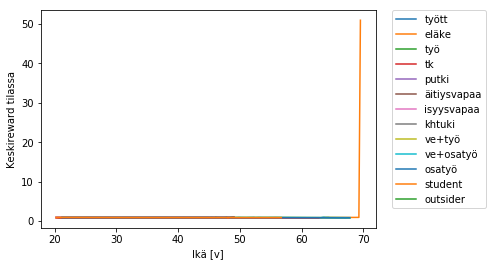

No handles with labels found to put in legend.


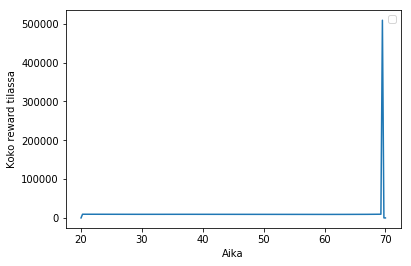

Yhteensä reward 236.8216811479839


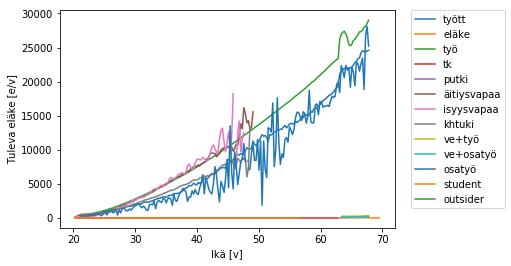

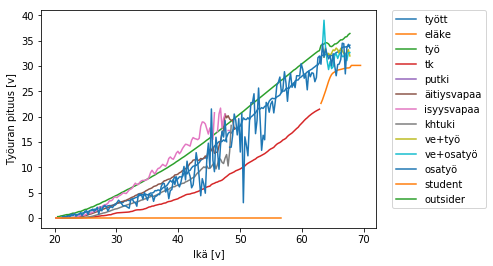

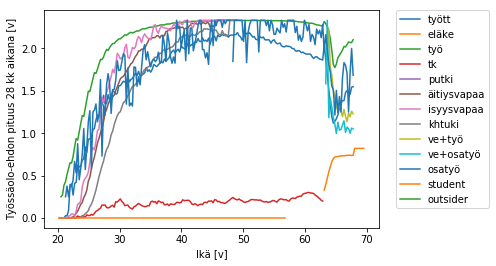

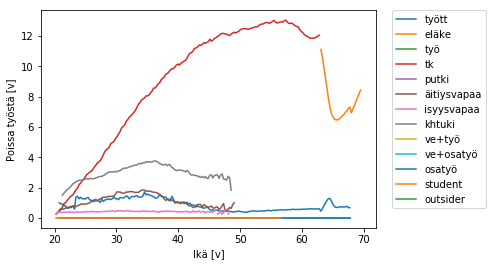

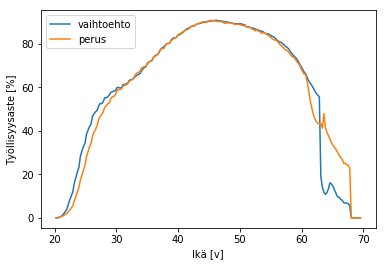

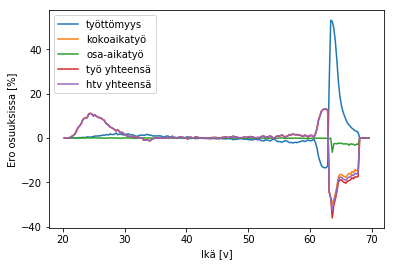

Työllisyysvaikutus 30-63-vuotiaisiin noin 17285.0 htv ja 16742.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 2.270923846328099 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10178545204690609


In [ ]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.954    |
| fps                | 2039     |
| nupdates           | 1        |
| policy_entropy     | 0.736    |
| policy_loss        | 0.0196   |
| total_timesteps    | 0        |
| value_loss         | 0.522    |
---------------------------------
---------------------------------
| explained_variance | 0.711    |
| fps                | 3081     |
| nupdates           | 10       |
| policy_entropy     | 0.3      |
| policy_loss        | -0.268   |
| total_timesteps    | 36729    |
| value_loss         | 3.93     |
---------------------------------
---------------------------------
| explained_variance | 0.391    |
| fps                | 2783     |
| nupdates           | 20       |
| policy_entropy     | 0.409    |
| policy_loss        | 4.02     |
| total_timesteps    | 77539    |
| value_loss         | 103      |
------------------------

---------------------------------
| explained_variance | 0.965    |
| fps                | 2583     |
| nupdates           | 270      |
| policy_entropy     | 0.641    |
| policy_loss        | 0.159    |
| total_timesteps    | 1097789  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 2582     |
| nupdates           | 280      |
| policy_entropy     | 0.63     |
| policy_loss        | 0.927    |
| total_timesteps    | 1138599  |
| value_loss         | 2.65     |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 2583     |
| nupdates           | 290      |
| policy_entropy     | 0.668    |
| policy_loss        | -0.63    |
| total_timesteps    | 1179409  |
| value_loss         | 1.51     |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2585     |
| nupdates           | 540      |
| policy_entropy     | 0.685    |
| policy_loss        | 0.115    |
| total_timesteps    | 2199659  |
| value_loss         | 0.456    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2585     |
| nupdates           | 550      |
| policy_entropy     | 0.671    |
| policy_loss        | -0.148   |
| total_timesteps    | 2240469  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2586     |
| nupdates           | 560      |
| policy_entropy     | 0.687    |
| policy_loss        | 0.108    |
| total_timesteps    | 2281279  |
| value_loss         | 0.437    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2587     |
| nupdates           | 810      |
| policy_entropy     | 0.621    |
| policy_loss        | 0.0121   |
| total_timesteps    | 3301529  |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2587     |
| nupdates           | 820      |
| policy_entropy     | 0.671    |
| policy_loss        | 0.0303   |
| total_timesteps    | 3342339  |
| value_loss         | 0.399    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2588     |
| nupdates           | 830      |
| policy_entropy     | 0.703    |
| policy_loss        | -0.032   |
| total_timesteps    | 3383149  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 2592     |
| nupdates           | 1080     |
| policy_entropy     | 0.725    |
| policy_loss        | 0.0534   |
| total_timesteps    | 4403399  |
| value_loss         | 0.622    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2592     |
| nupdates           | 1090     |
| policy_entropy     | 0.673    |
| policy_loss        | -0.0909  |
| total_timesteps    | 4444209  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2592     |
| nupdates           | 1100     |
| policy_entropy     | 0.671    |
| policy_loss        | 0.0687   |
| total_timesteps    | 4485019  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2595     |
| nupdates           | 1350     |
| policy_entropy     | 0.709    |
| policy_loss        | 0.0163   |
| total_timesteps    | 5505269  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2595     |
| nupdates           | 1360     |
| policy_entropy     | 0.695    |
| policy_loss        | 0.0481   |
| total_timesteps    | 5546079  |
| value_loss         | 0.419    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2595     |
| nupdates           | 1370     |
| policy_entropy     | 0.726    |
| policy_loss        | -0.0303  |
| total_timesteps    | 5586889  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2598     |
| nupdates           | 1620     |
| policy_entropy     | 0.67     |
| policy_loss        | -0.00384 |
| total_timesteps    | 6607139  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2598     |
| nupdates           | 1630     |
| policy_entropy     | 0.708    |
| policy_loss        | -0.0141  |
| total_timesteps    | 6647949  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2598     |
| nupdates           | 1640     |
| policy_entropy     | 0.683    |
| policy_loss        | 0.0254   |
| total_timesteps    | 6688759  |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2601     |
| nupdates           | 1890     |
| policy_entropy     | 0.65     |
| policy_loss        | 0.0468   |
| total_timesteps    | 7709009  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2602     |
| nupdates           | 1900     |
| policy_entropy     | 0.605    |
| policy_loss        | -0.0632  |
| total_timesteps    | 7749819  |
| value_loss         | 0.587    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2602     |
| nupdates           | 1910     |
| policy_entropy     | 0.652    |
| policy_loss        | -0.00302 |
| total_timesteps    | 7790629  |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 2605     |
| nupdates           | 2160     |
| policy_entropy     | 0.662    |
| policy_loss        | -0.0621  |
| total_timesteps    | 8810879  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2605     |
| nupdates           | 2170     |
| policy_entropy     | 0.647    |
| policy_loss        | 0.0448   |
| total_timesteps    | 8851689  |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 2605     |
| nupdates           | 2180     |
| policy_entropy     | 0.701    |
| policy_loss        | -0.0761  |
| total_timesteps    | 8892499  |
| value_loss         | 0.802    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2607     |
| nupdates           | 2430     |
| policy_entropy     | 0.685    |
| policy_loss        | 0.0133   |
| total_timesteps    | 9912749  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 2607     |
| nupdates           | 2440     |
| policy_entropy     | 0.7      |
| policy_loss        | -0.106   |
| total_timesteps    | 9953559  |
| value_loss         | 0.766    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2607     |
| nupdates           | 2450     |
| policy_entropy     | 0.654    |
| policy_loss        | 0.00305  |
| total_timesteps    | 9994369  |
| value_loss         | 0.399    |
---------------------------------
done
predict...
simulating  best/malli_ek
predicting...


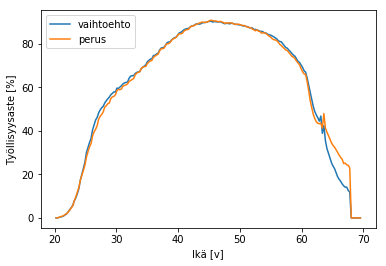

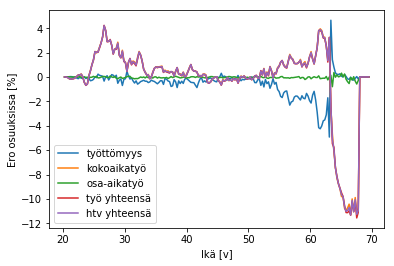

Työllisyysvaikutus 30-63-vuotiaisiin noin 14415.0 htv ja 13967.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 1.894516387627787 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10384227099394092


In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.957    |
| fps                | 2106     |
| nupdates           | 1        |
| policy_entropy     | 0.652    |
| policy_loss        | -0.0777  |
| total_timesteps    | 0        |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 3103     |
| nupdates           | 10       |
| policy_entropy     | 0.35     |
| policy_loss        | 0.924    |
| total_timesteps    | 36729    |
| value_loss         | 6.18     |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 2798     |
| nupdates           | 20       |
| policy_entropy     | 0.254    |
| policy_loss        | -0.491   |
| total_timesteps    | 77539    |
| value_loss         | 7.17     |
------------------------

---------------------------------
| explained_variance | 0.887    |
| fps                | 2585     |
| nupdates           | 270      |
| policy_entropy     | 0.512    |
| policy_loss        | -0.903   |
| total_timesteps    | 1097789  |
| value_loss         | 4.16     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2585     |
| nupdates           | 280      |
| policy_entropy     | 0.481    |
| policy_loss        | 0.191    |
| total_timesteps    | 1138599  |
| value_loss         | 0.476    |
---------------------------------
---------------------------------
| explained_variance | 0.909    |
| fps                | 2585     |
| nupdates           | 290      |
| policy_entropy     | 0.488    |
| policy_loss        | 0.472    |
| total_timesteps    | 1179409  |
| value_loss         | 2.41     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2589     |
| nupdates           | 540      |
| policy_entropy     | 0.647    |
| policy_loss        | -0.0351  |
| total_timesteps    | 2199659  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2589     |
| nupdates           | 550      |
| policy_entropy     | 0.699    |
| policy_loss        | 0.0356   |
| total_timesteps    | 2240469  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2589     |
| nupdates           | 560      |
| policy_entropy     | 0.677    |
| policy_loss        | -0.0906  |
| total_timesteps    | 2281279  |
| value_loss         | 0.414    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 2595     |
| nupdates           | 810      |
| policy_entropy     | 0.683    |
| policy_loss        | -0.0237  |
| total_timesteps    | 3301529  |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2595     |
| nupdates           | 820      |
| policy_entropy     | 0.668    |
| policy_loss        | 0.0183   |
| total_timesteps    | 3342339  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2595     |
| nupdates           | 830      |
| policy_entropy     | 0.677    |
| policy_loss        | -0.09    |
| total_timesteps    | 3383149  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2600     |
| nupdates           | 1080     |
| policy_entropy     | 0.684    |
| policy_loss        | -0.0598  |
| total_timesteps    | 4403399  |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2600     |
| nupdates           | 1090     |
| policy_entropy     | 0.703    |
| policy_loss        | 0.00706  |
| total_timesteps    | 4444209  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2600     |
| nupdates           | 1100     |
| policy_entropy     | 0.678    |
| policy_loss        | 0.0233   |
| total_timesteps    | 4485019  |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2605     |
| nupdates           | 1350     |
| policy_entropy     | 0.642    |
| policy_loss        | -0.00961 |
| total_timesteps    | 5505269  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2605     |
| nupdates           | 1360     |
| policy_entropy     | 0.641    |
| policy_loss        | -0.0391  |
| total_timesteps    | 5546079  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2605     |
| nupdates           | 1370     |
| policy_entropy     | 0.68     |
| policy_loss        | 0.141    |
| total_timesteps    | 5586889  |
| value_loss         | 0.36     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2610     |
| nupdates           | 1620     |
| policy_entropy     | 0.754    |
| policy_loss        | 0.0934   |
| total_timesteps    | 6607139  |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2610     |
| nupdates           | 1630     |
| policy_entropy     | 0.688    |
| policy_loss        | -0.136   |
| total_timesteps    | 6647949  |
| value_loss         | 0.413    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2611     |
| nupdates           | 1640     |
| policy_entropy     | 0.696    |
| policy_loss        | 0.0308   |
| total_timesteps    | 6688759  |
| value_loss         | 0.239    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2615     |
| nupdates           | 1890     |
| policy_entropy     | 0.691    |
| policy_loss        | -0.0565  |
| total_timesteps    | 7709009  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 2615     |
| nupdates           | 1900     |
| policy_entropy     | 0.674    |
| policy_loss        | -0.043   |
| total_timesteps    | 7749819  |
| value_loss         | 0.563    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2615     |
| nupdates           | 1910     |
| policy_entropy     | 0.675    |
| policy_loss        | -0.0276  |
| total_timesteps    | 7790629  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2619     |
| nupdates           | 2160     |
| policy_entropy     | 0.732    |
| policy_loss        | -0.0891  |
| total_timesteps    | 8810879  |
| value_loss         | 0.47     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 2619     |
| nupdates           | 2170     |
| policy_entropy     | 0.667    |
| policy_loss        | -0.0449  |
| total_timesteps    | 8851689  |
| value_loss         | 0.534    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2620     |
| nupdates           | 2180     |
| policy_entropy     | 0.642    |
| policy_loss        | -0.0985  |
| total_timesteps    | 8892499  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2622     |
| nupdates           | 2430     |
| policy_entropy     | 0.639    |
| policy_loss        | 0.0687   |
| total_timesteps    | 9912749  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2622     |
| nupdates           | 2440     |
| policy_entropy     | 0.66     |
| policy_loss        | -0.0154  |
| total_timesteps    | 9953559  |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2622     |
| nupdates           | 2450     |
| policy_entropy     | 0.625    |
| policy_loss        | -0.0101  |
| total_timesteps    | 9994369  |
| value_loss         | 0.318    |
---------------------------------
done
predict...
simulating  best/best_12kk
predicting...


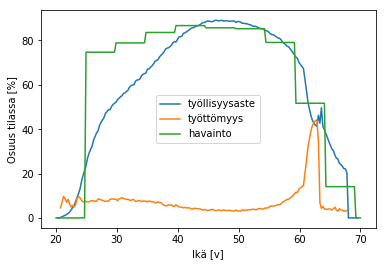

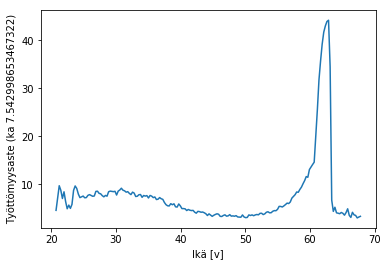

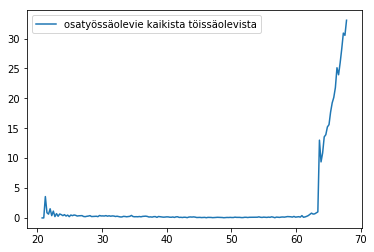

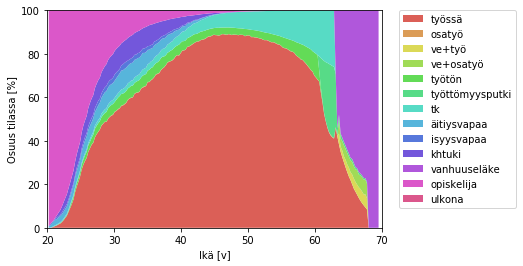

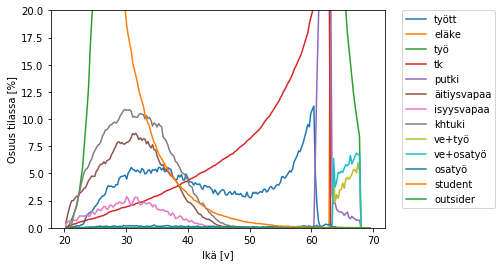

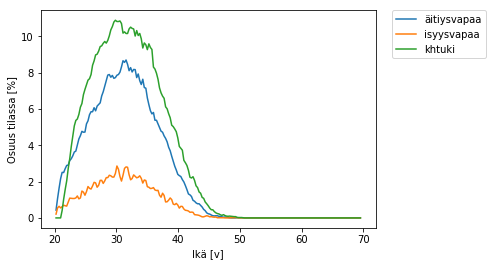

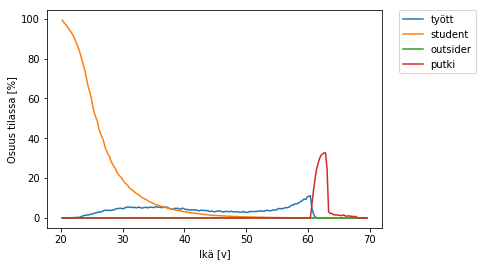

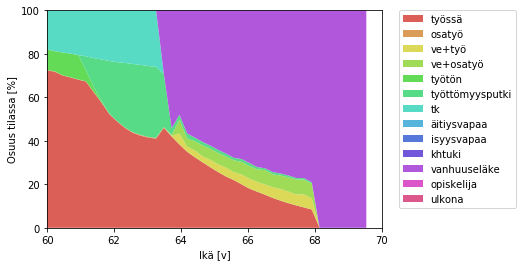

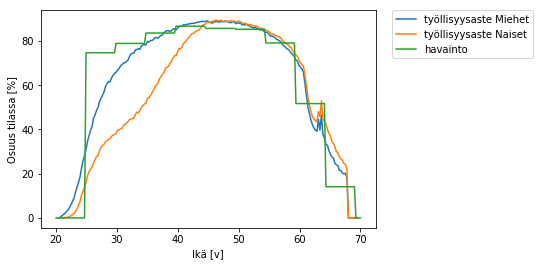

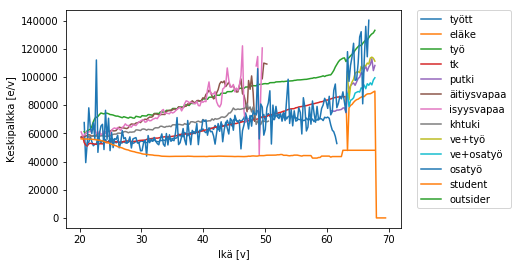

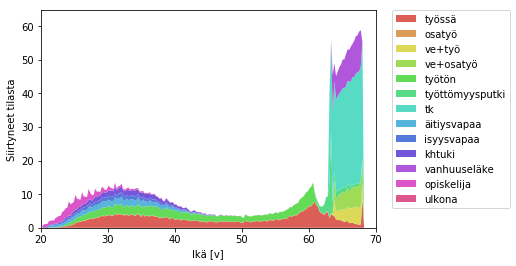

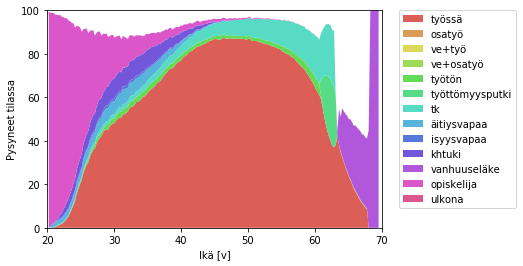

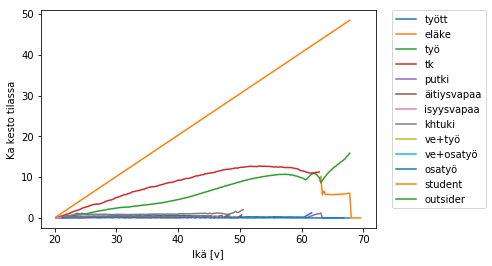

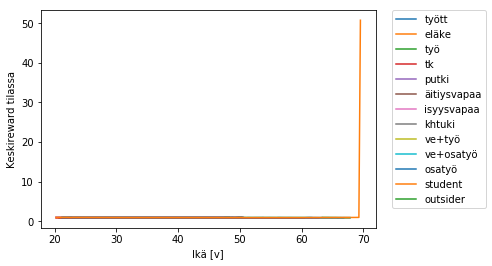

No handles with labels found to put in legend.


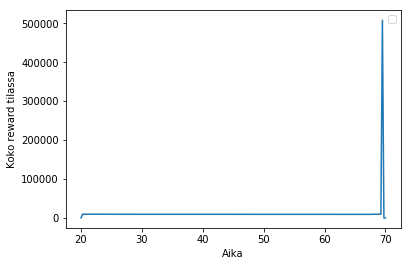

Yhteensä reward 236.47900157451107


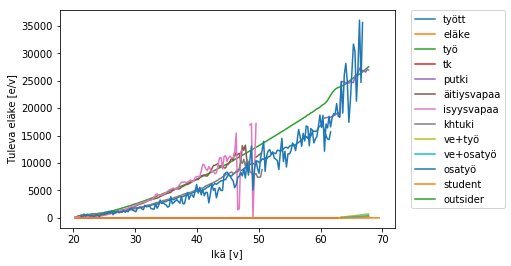

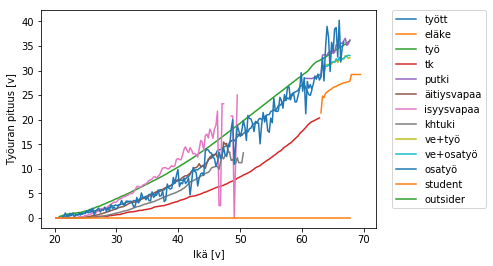

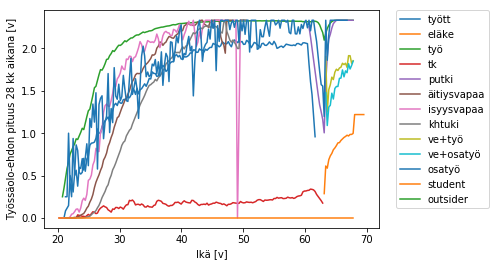

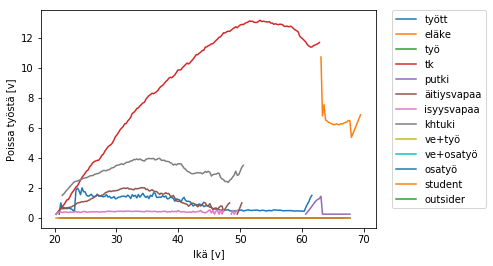

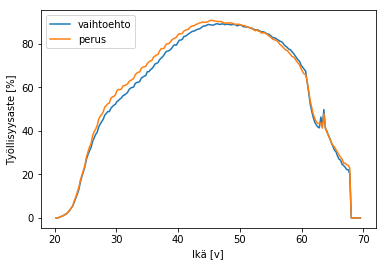

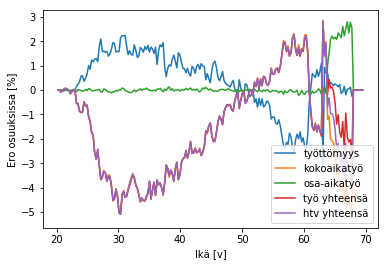

Työllisyysvaikutus 30-63-vuotiaisiin noin -34490.0 htv ja -34702.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -4.707060047501965 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.11790217594138193


In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.977    |
| fps                | 2056     |
| nupdates           | 1        |
| policy_entropy     | 0.662    |
| policy_loss        | -0.0583  |
| total_timesteps    | 0        |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 3043     |
| nupdates           | 10       |
| policy_entropy     | 0.448    |
| policy_loss        | 1.13     |
| total_timesteps    | 36729    |
| value_loss         | 5.97     |
---------------------------------
---------------------------------
| explained_variance | 0.841    |
| fps                | 2772     |
| nupdates           | 20       |
| policy_entropy     | 0.392    |
| policy_loss        | -0.829   |
| total_timesteps    | 77539    |
| value_loss         | 5.7      |
------------------------

---------------------------------
| explained_variance | 0.97     |
| fps                | 2578     |
| nupdates           | 270      |
| policy_entropy     | 0.727    |
| policy_loss        | 0.611    |
| total_timesteps    | 1097789  |
| value_loss         | 1.22     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2579     |
| nupdates           | 280      |
| policy_entropy     | 0.728    |
| policy_loss        | -0.146   |
| total_timesteps    | 1138599  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2579     |
| nupdates           | 290      |
| policy_entropy     | 0.72     |
| policy_loss        | -0.455   |
| total_timesteps    | 1179409  |
| value_loss         | 0.78     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 2582     |
| nupdates           | 540      |
| policy_entropy     | 0.717    |
| policy_loss        | -0.0413  |
| total_timesteps    | 2199659  |
| value_loss         | 0.444    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2582     |
| nupdates           | 550      |
| policy_entropy     | 0.759    |
| policy_loss        | -0.0482  |
| total_timesteps    | 2240469  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2582     |
| nupdates           | 560      |
| policy_entropy     | 0.696    |
| policy_loss        | 0.0368   |
| total_timesteps    | 2281279  |
| value_loss         | 0.318    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 2583     |
| nupdates           | 810      |
| policy_entropy     | 0.667    |
| policy_loss        | -0.0256  |
| total_timesteps    | 3301529  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2583     |
| nupdates           | 820      |
| policy_entropy     | 0.723    |
| policy_loss        | -0.0744  |
| total_timesteps    | 3342339  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2583     |
| nupdates           | 830      |
| policy_entropy     | 0.675    |
| policy_loss        | 0.0761   |
| total_timesteps    | 3383149  |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2587     |
| nupdates           | 1080     |
| policy_entropy     | 0.661    |
| policy_loss        | 0.0061   |
| total_timesteps    | 4403399  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 2587     |
| nupdates           | 1090     |
| policy_entropy     | 0.691    |
| policy_loss        | -0.0626  |
| total_timesteps    | 4444209  |
| value_loss         | 0.788    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2588     |
| nupdates           | 1100     |
| policy_entropy     | 0.683    |
| policy_loss        | -0.0112  |
| total_timesteps    | 4485019  |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2592     |
| nupdates           | 1350     |
| policy_entropy     | 0.738    |
| policy_loss        | -0.00915 |
| total_timesteps    | 5505269  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 2592     |
| nupdates           | 1360     |
| policy_entropy     | 0.683    |
| policy_loss        | -0.0822  |
| total_timesteps    | 5546079  |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2592     |
| nupdates           | 1370     |
| policy_entropy     | 0.657    |
| policy_loss        | 0.0817   |
| total_timesteps    | 5586889  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 2595     |
| nupdates           | 1620     |
| policy_entropy     | 0.658    |
| policy_loss        | -0.107   |
| total_timesteps    | 6607139  |
| value_loss         | 0.547    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2596     |
| nupdates           | 1630     |
| policy_entropy     | 0.63     |
| policy_loss        | -0.0657  |
| total_timesteps    | 6647949  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2596     |
| nupdates           | 1640     |
| policy_entropy     | 0.732    |
| policy_loss        | -0.0714  |
| total_timesteps    | 6688759  |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 2599     |
| nupdates           | 1890     |
| policy_entropy     | 0.669    |
| policy_loss        | 0.0129   |
| total_timesteps    | 7709009  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2599     |
| nupdates           | 1900     |
| policy_entropy     | 0.682    |
| policy_loss        | -0.0604  |
| total_timesteps    | 7749819  |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2599     |
| nupdates           | 1910     |
| policy_entropy     | 0.65     |
| policy_loss        | 0.00658  |
| total_timesteps    | 7790629  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 2602     |
| nupdates           | 2160     |
| policy_entropy     | 0.678    |
| policy_loss        | -0.0715  |
| total_timesteps    | 8810879  |
| value_loss         | 0.5      |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2602     |
| nupdates           | 2170     |
| policy_entropy     | 0.714    |
| policy_loss        | -0.0463  |
| total_timesteps    | 8851689  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2602     |
| nupdates           | 2180     |
| policy_entropy     | 0.661    |
| policy_loss        | 0.0331   |
| total_timesteps    | 8892499  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2604     |
| nupdates           | 2430     |
| policy_entropy     | 0.658    |
| policy_loss        | -0.0409  |
| total_timesteps    | 9912749  |
| value_loss         | 0.367    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2604     |
| nupdates           | 2440     |
| policy_entropy     | 0.743    |
| policy_loss        | -0.0443  |
| total_timesteps    | 9953559  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2604     |
| nupdates           | 2450     |
| policy_entropy     | 0.645    |
| policy_loss        | -0.0181  |
| total_timesteps    | 9994369  |
| value_loss         | 0.462    |
---------------------------------
done
predict...
simulating  best/malli_50pv
predicting...


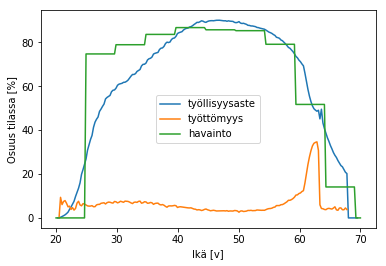

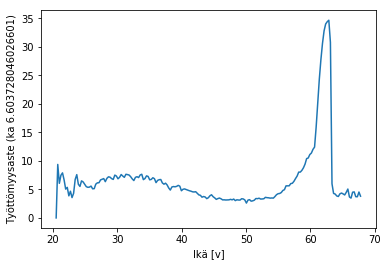

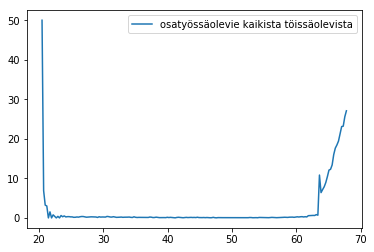

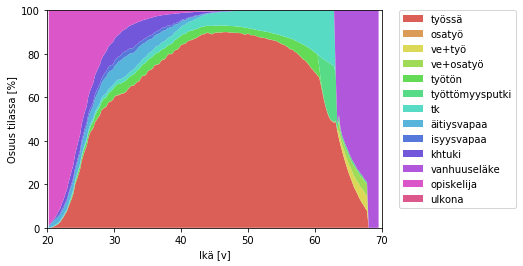

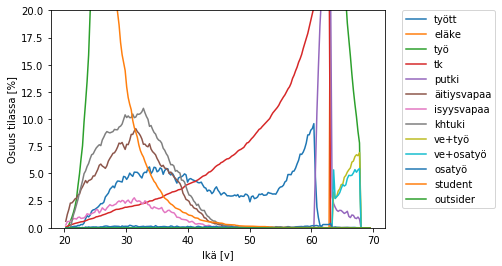

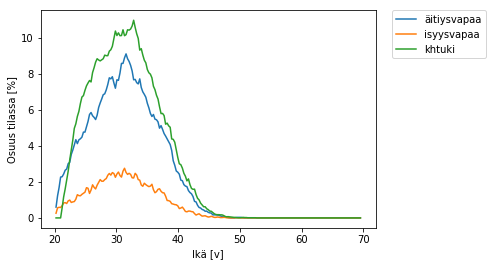

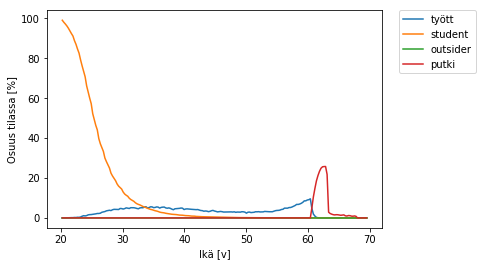

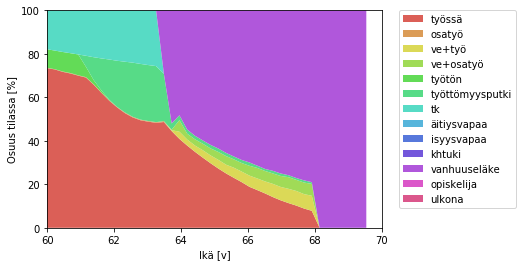

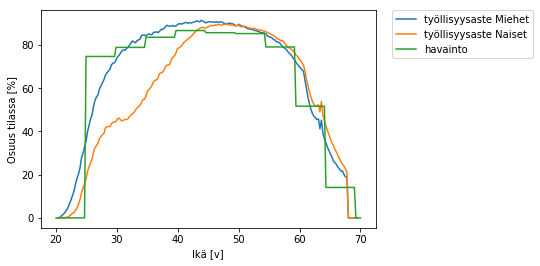

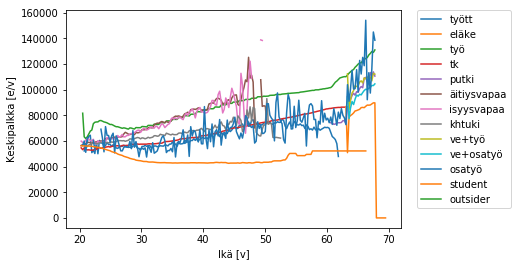

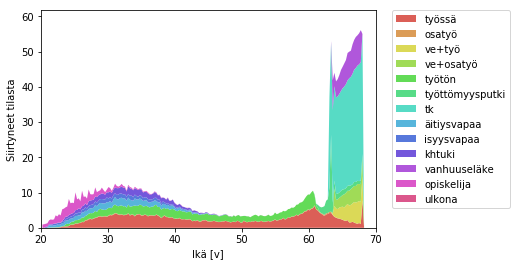

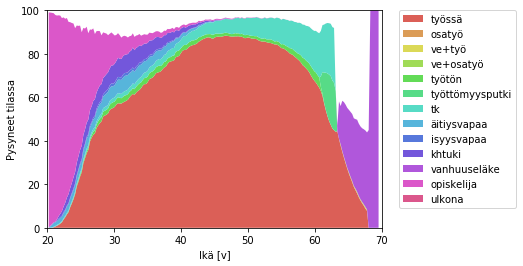

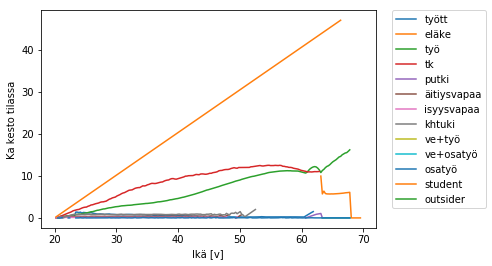

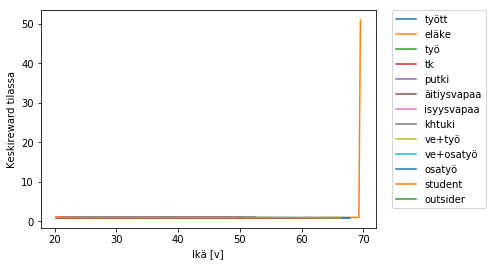

No handles with labels found to put in legend.


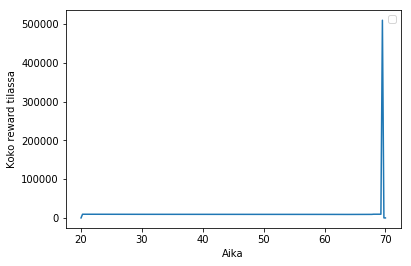

Yhteensä reward 236.74222926069055


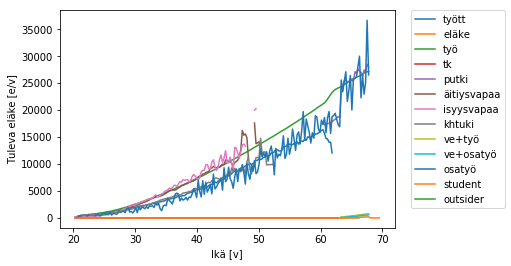

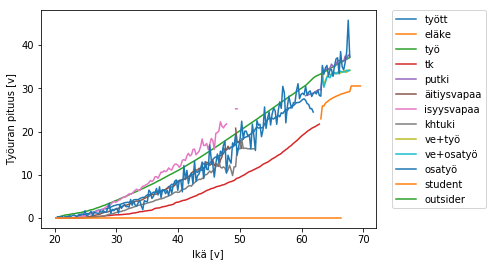

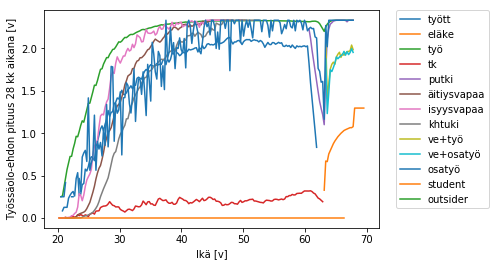

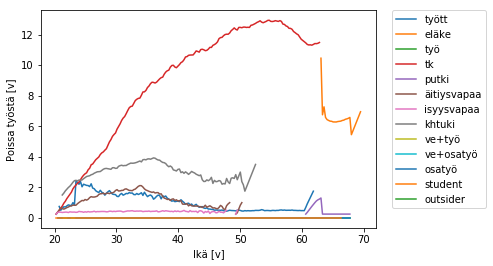

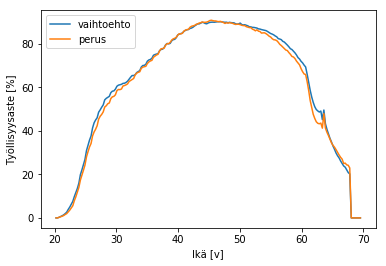

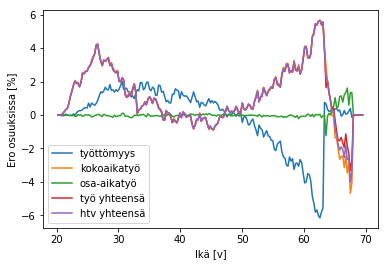

Työllisyysvaikutus 30-63-vuotiaisiin noin 24740.0 htv ja 24368.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 3.3053322355347525 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10107905474242265


In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

Alustava versio. Tulee muuttumaan, kun mukana koko mallli.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.975    |
| fps                | 2019     |
| nupdates           | 1        |
| policy_entropy     | 0.694    |
| policy_loss        | 0.0678   |
| total_timesteps    | 0        |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.763    |
| fps                | 3021     |
| nupdates           | 10       |
| policy_entropy     | 0.627    |
| policy_loss        | -1.3     |
| total_timesteps    | 36729    |
| value_loss         | 5.7      |
---------------------------------
---------------------------------
| explained_variance | 0.895    |
| fps                | 2764     |
| nupdates           | 20       |
| policy_entropy     | 0.661    |
| policy_loss        | 1.56     |
| total_timesteps    | 77539    |
| value_loss         | 6.09     |
------------------------

---------------------------------
| explained_variance | 0.966    |
| fps                | 2595     |
| nupdates           | 270      |
| policy_entropy     | 0.669    |
| policy_loss        | -0.736   |
| total_timesteps    | 1097789  |
| value_loss         | 1.5      |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 2595     |
| nupdates           | 280      |
| policy_entropy     | 0.68     |
| policy_loss        | -0.625   |
| total_timesteps    | 1138599  |
| value_loss         | 1.52     |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 2595     |
| nupdates           | 290      |
| policy_entropy     | 0.688    |
| policy_loss        | 0.668    |
| total_timesteps    | 1179409  |
| value_loss         | 1.39     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 2607     |
| nupdates           | 540      |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0549  |
| total_timesteps    | 2199659  |
| value_loss         | 0.413    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2607     |
| nupdates           | 550      |
| policy_entropy     | 0.693    |
| policy_loss        | 0.0259   |
| total_timesteps    | 2240469  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 2607     |
| nupdates           | 560      |
| policy_entropy     | 0.69     |
| policy_loss        | 0.0281   |
| total_timesteps    | 2281279  |
| value_loss         | 0.529    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2614     |
| nupdates           | 810      |
| policy_entropy     | 0.657    |
| policy_loss        | -0.0359  |
| total_timesteps    | 3301529  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2614     |
| nupdates           | 820      |
| policy_entropy     | 0.646    |
| policy_loss        | -0.05    |
| total_timesteps    | 3342339  |
| value_loss         | 0.318    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2614     |
| nupdates           | 830      |
| policy_entropy     | 0.679    |
| policy_loss        | -0.0344  |
| total_timesteps    | 3383149  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2618     |
| nupdates           | 1080     |
| policy_entropy     | 0.675    |
| policy_loss        | 0.128    |
| total_timesteps    | 4403399  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2618     |
| nupdates           | 1090     |
| policy_entropy     | 0.74     |
| policy_loss        | -0.0569  |
| total_timesteps    | 4444209  |
| value_loss         | 0.502    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2618     |
| nupdates           | 1100     |
| policy_entropy     | 0.696    |
| policy_loss        | -0.0684  |
| total_timesteps    | 4485019  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2622     |
| nupdates           | 1350     |
| policy_entropy     | 0.674    |
| policy_loss        | -0.0229  |
| total_timesteps    | 5505269  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2622     |
| nupdates           | 1360     |
| policy_entropy     | 0.679    |
| policy_loss        | 0.0115   |
| total_timesteps    | 5546079  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2622     |
| nupdates           | 1370     |
| policy_entropy     | 0.663    |
| policy_loss        | 0.0169   |
| total_timesteps    | 5586889  |
| value_loss         | 0.522    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2623     |
| nupdates           | 1620     |
| policy_entropy     | 0.669    |
| policy_loss        | -0.0949  |
| total_timesteps    | 6607139  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2624     |
| nupdates           | 1630     |
| policy_entropy     | 0.657    |
| policy_loss        | 0.0391   |
| total_timesteps    | 6647949  |
| value_loss         | 0.199    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2624     |
| nupdates           | 1640     |
| policy_entropy     | 0.675    |
| policy_loss        | -0.0757  |
| total_timesteps    | 6688759  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2627     |
| nupdates           | 1890     |
| policy_entropy     | 0.661    |
| policy_loss        | 0.0876   |
| total_timesteps    | 7709009  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 2628     |
| nupdates           | 1900     |
| policy_entropy     | 0.648    |
| policy_loss        | -0.0956  |
| total_timesteps    | 7749819  |
| value_loss         | 0.462    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2628     |
| nupdates           | 1910     |
| policy_entropy     | 0.665    |
| policy_loss        | 0.0572   |
| total_timesteps    | 7790629  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.935    |
| fps                | 2630     |
| nupdates           | 2160     |
| policy_entropy     | 0.706    |
| policy_loss        | -0.00511 |
| total_timesteps    | 8810879  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2630     |
| nupdates           | 2170     |
| policy_entropy     | 0.658    |
| policy_loss        | -0.0368  |
| total_timesteps    | 8851689  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2630     |
| nupdates           | 2180     |
| policy_entropy     | 0.697    |
| policy_loss        | 0.00842  |
| total_timesteps    | 8892499  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2631     |
| nupdates           | 2430     |
| policy_entropy     | 0.638    |
| policy_loss        | 0.0506   |
| total_timesteps    | 9912749  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2631     |
| nupdates           | 2440     |
| policy_entropy     | 0.692    |
| policy_loss        | 0.0773   |
| total_timesteps    | 9953559  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2631     |
| nupdates           | 2450     |
| policy_entropy     | 0.716    |
| policy_loss        | -0.0533  |
| total_timesteps    | 9994369  |
| value_loss         | 0.459    |
---------------------------------
done
predict...
simulating  best/malli_pt
predicting...


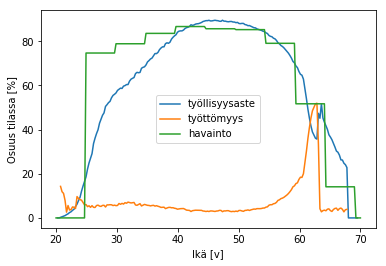

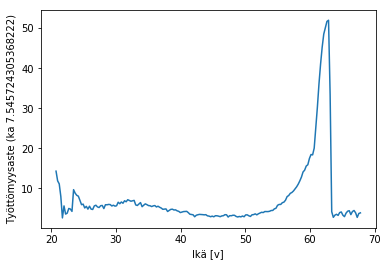

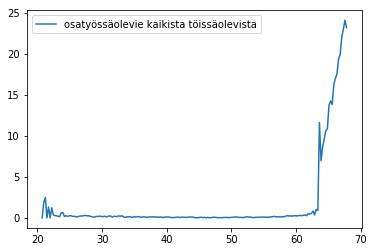

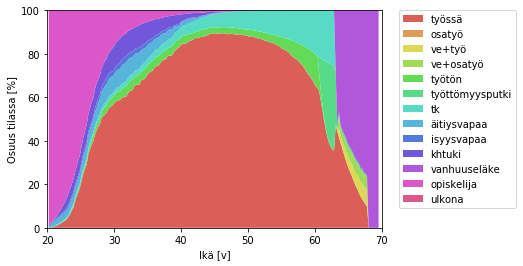

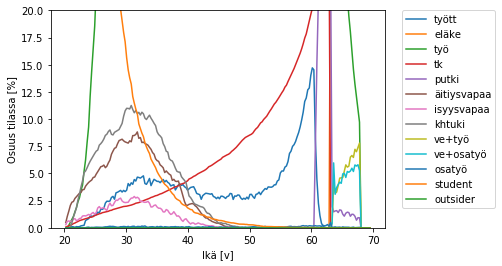

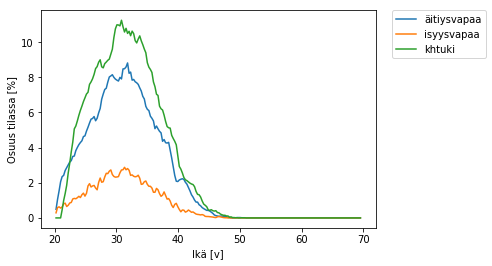

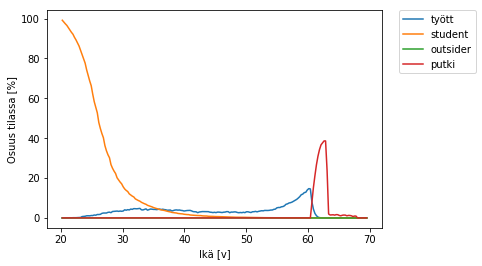

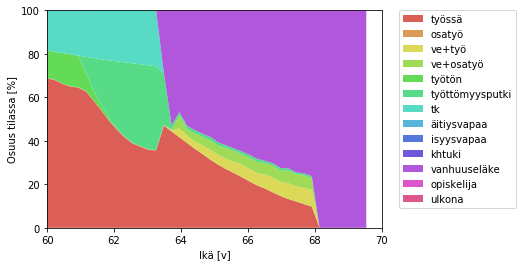

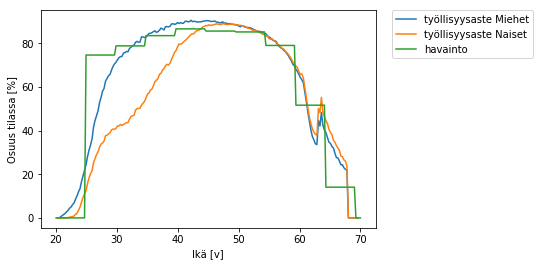

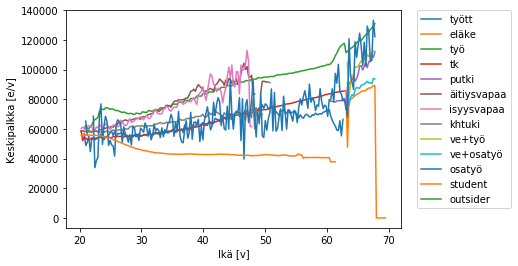

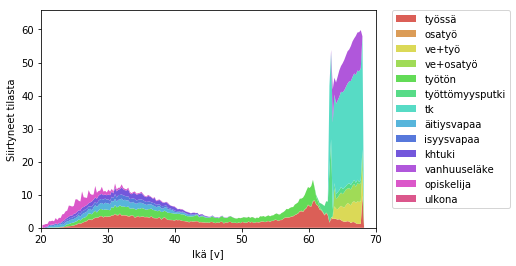

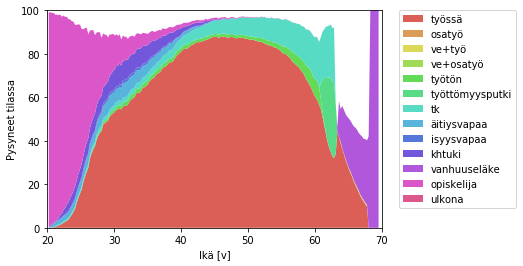

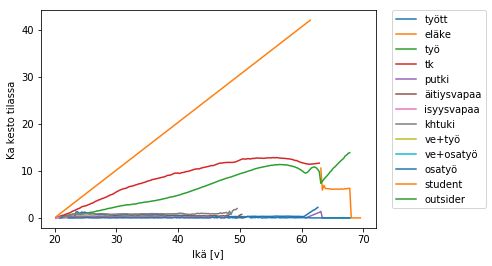

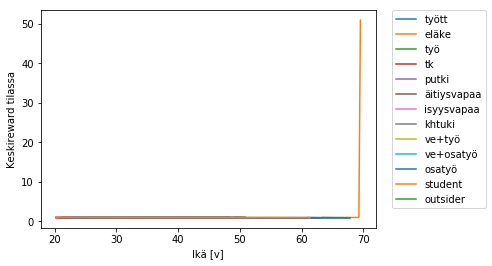

No handles with labels found to put in legend.


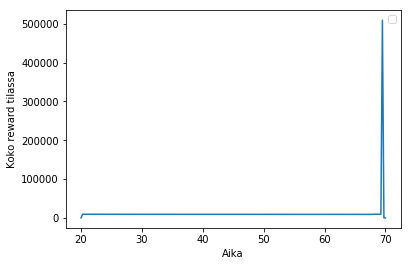

Yhteensä reward 236.59055490094303


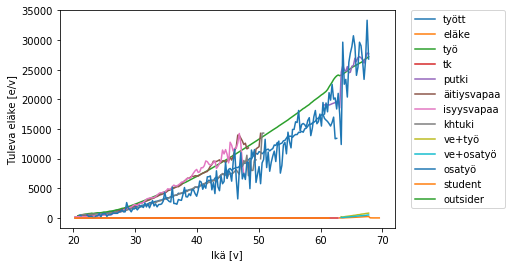

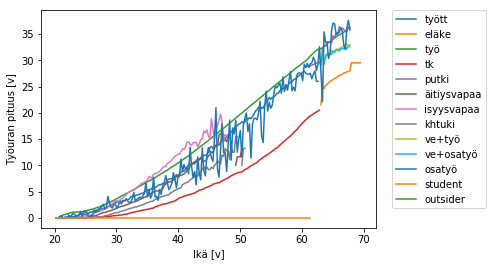

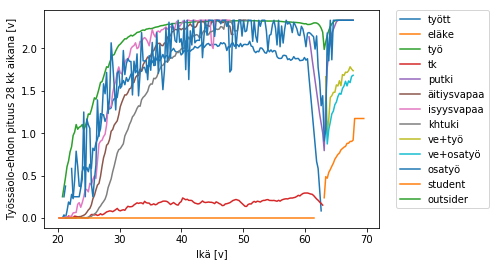

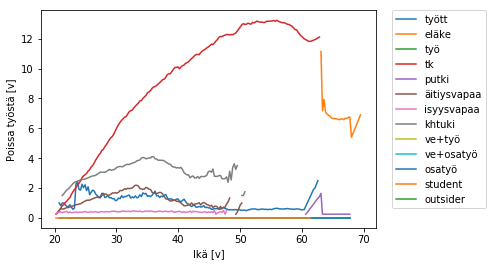

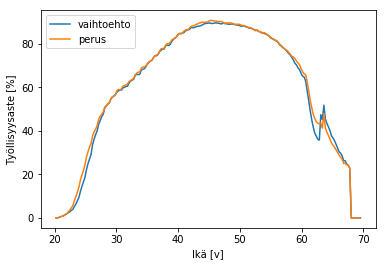

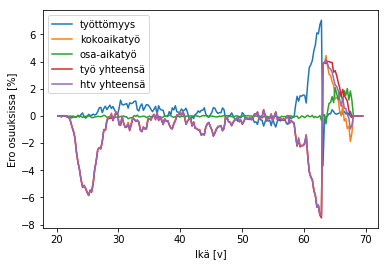

Työllisyysvaikutus 30-63-vuotiaisiin noin -17375.0 htv ja -17883.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -2.4256917419594792 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.11666779947059247


In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.97     |
| fps                | 1968     |
| nupdates           | 1        |
| policy_entropy     | 0.655    |
| policy_loss        | -0.0242  |
| total_timesteps    | 0        |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.315    |
| fps                | 2953     |
| nupdates           | 10       |
| policy_entropy     | 0.235    |
| policy_loss        | -0.417   |
| total_timesteps    | 36729    |
| value_loss         | 8.94     |
---------------------------------
